Found 841 images belonging to 5 classes.
Found 208 images belonging to 5 classes.
Epoch 1/10
26/26 [==============================] - 107s 4s/step - loss: 1.7344 - accuracy: 0.3523 - val_loss: 1.4016 - val_accuracy: 0.4583
Epoch 2/10
26/26 [==============================] - 93s 4s/step - loss: 1.0618 - accuracy: 0.5674 - val_loss: 1.1982 - val_accuracy: 0.5208
Epoch 3/10
26/26 [==============================] - 99s 4s/step - loss: 0.7902 - accuracy: 0.6724 - val_loss: 1.2621 - val_accuracy: 0.6042
Epoch 4/10
26/26 [==============================] - 101s 4s/step - loss: 0.7099 - accuracy: 0.7120 - val_loss: 0.9914 - val_accuracy: 0.6719
Epoch 5/10
26/26 [==============================] - 99s 4s/step - loss: 0.5208 - accuracy: 0.7886 - val_loss: 1.0407 - val_accuracy: 0.6719
Epoch 6/10
26/26 [==============================] - 101s 4s/step - loss: 0.4075 - accuracy: 0.8517 - val_loss: 1.0699 - val_accuracy: 0.7448
Epoch 7/10
26/26 [==============================] - 108s 4s/step - loss: 0.

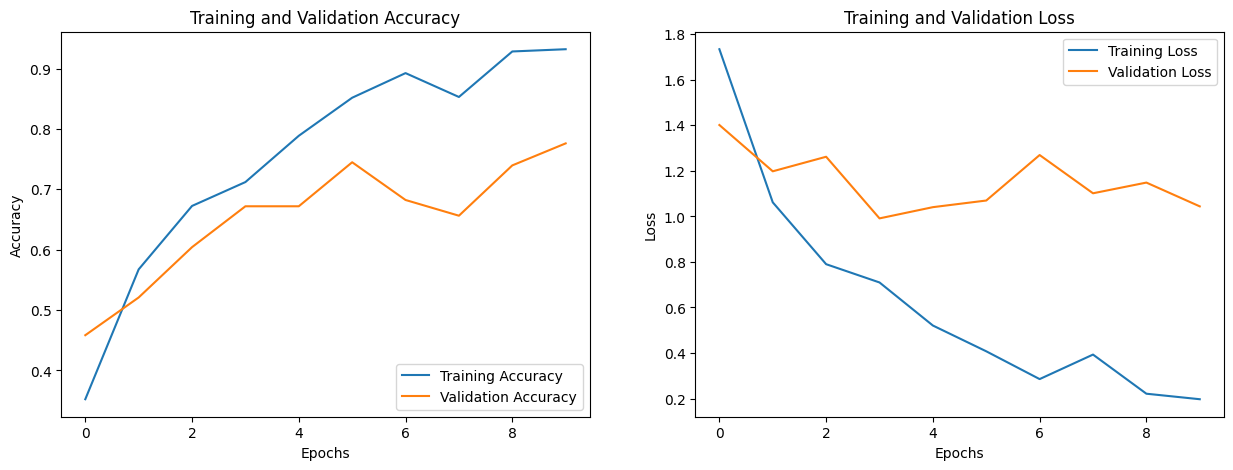

In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Define constants
batch_size = 32
image_size = (224, 224)
epochs = 10

# Specify the path to your dataset
dataset_path = './data/'

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into 80% training and 20% validation
)

# Load and augment data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set to 'training' to get the training set
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set to 'validation' to get the validation set
)

# Build a simple convolutional neural network (CNN) model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))  # Output classes dynamically based on the number of classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model.save('tea_leaf_classifier.h5')

# Plot training accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()
